In [1]:
from utils import *

### Loading Dataset(Original)

In [2]:
data = load_data("owid-co2-data.csv")
columns_cookbook = load_data("owid-co2-codebook.csv")

In [3]:
data.shape

(26008, 60)

In [4]:
percent_of_columns_with_missing_values(data)

0.52

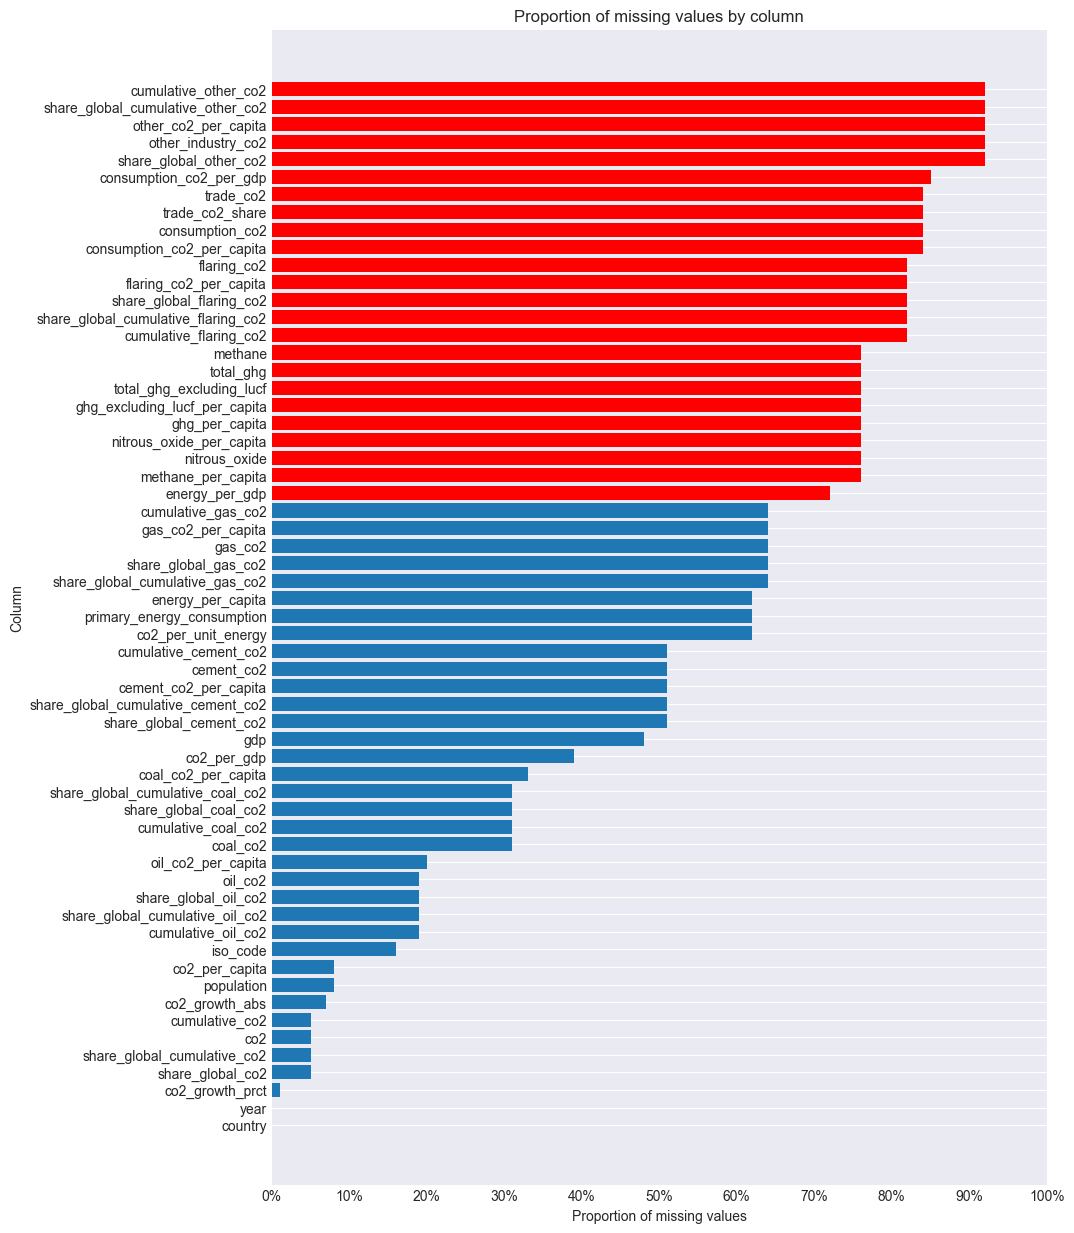

In [3]:
plot_proportion_of_missing_values_by_column(data, threshold=0.7)

# Reducing the dimensionality of the dataset

In [4]:
data_subset = filter_data_based_on_missing_values(data, threshold=0.7)
cols_desc_dict = get_cols_description(columns_cookbook)
print(data_subset.shape)

(26008, 36)


In [5]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26008 entries, 0 to 26007
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   country                             26008 non-null  object 
 1   year                                26008 non-null  int64  
 2   iso_code                            21913 non-null  object 
 3   population                          23878 non-null  float64
 4   gdp                                 13479 non-null  float64
 5   cement_co2                          12668 non-null  float64
 6   cement_co2_per_capita               12638 non-null  float64
 7   co2                                 24670 non-null  float64
 8   co2_growth_abs                      24294 non-null  float64
 9   co2_growth_prct                     25696 non-null  float64
 10  co2_per_capita                      24032 non-null  float64
 11  co2_per_gdp                         15851

In [6]:
cols_desc_dict["co2"]

'Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.'

In [7]:
cols_desc_dict["population"]

'Population of each country or region.'

## Add Extra Columns  (Continent and Spatial Location)

In [8]:
data_subset = add_lat_and_long_to_df(data_subset)
data_subset = add_continent_to_df(data_subset)

In [ ]:
data_subset.dropna(subset=["lat", "long", "continent"], inplace=True)

In [ ]:
data_subset.isna().sum()

In [ ]:
get_cols_with_nan_values(data_subset)

In [ ]:
for remove_missing_val_method in ["mean", "row", "drop"]:
    print(f"Removing missing values using `{remove_missing_val_method}` method")
    out_df = remove_missing_values(data_subset, method=remove_missing_val_method)
    out_df.to_csv(f"data_{remove_missing_val_method}.csv", index=False)
    print(out_df.isna().sum())